In [96]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools as pt
from rdkit import DataStructs
from rdkit import rdBase
import pubchempy as pcp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def computeMorganFP(mol, depth=2, nBits=2048):
    a = np.zeros(nBits)
    try:
      DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol,depth,nBits),a)
    except:
      return None
    return a

In [37]:
chunks = pd.read_csv('CID_properties_nr.csv', chunksize=2000)

In [38]:
list_of_dfs = []
for df in chunks:
    list_of_dfs.append(df)

In [39]:
drugs = list_of_dfs[0]
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 2000 non-null   int64  
 1   HBondAcceptorCount  2000 non-null   int64  
 2   HBondDonorCount     2000 non-null   int64  
 3   IsomericSMILES      2000 non-null   object 
 4   MolecularWeight     2000 non-null   float64
 5   XLogP               1418 non-null   float64
 6   drug_class          2000 non-null   object 
 7   desalted_SMILES     2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [40]:
pt.AddMoleculeColumnToFrame(frame=drugs,smilesCol='IsomericSMILES', molCol='Molecule')

[18:16:32] WARNING: not removing hydrogen atom without neighbors


In [41]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 2000 non-null   int64  
 1   HBondAcceptorCount  2000 non-null   int64  
 2   HBondDonorCount     2000 non-null   int64  
 3   IsomericSMILES      2000 non-null   object 
 4   MolecularWeight     2000 non-null   float64
 5   XLogP               1418 non-null   float64
 6   drug_class          2000 non-null   object 
 7   desalted_SMILES     2000 non-null   object 
 8   Molecule            2000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 140.8+ KB


In [42]:
drugs.head()

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,Molecule
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,<rdkit.Chem.rdchem.Mol object at 0x0000022A97B...
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...


In [43]:
drugs['Morgan2FP'] = drugs['Molecule'].map(computeMorganFP)

In [45]:
display(drugs.info())
display(drugs.head())
drugs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 2000 non-null   int64  
 1   HBondAcceptorCount  2000 non-null   int64  
 2   HBondDonorCount     2000 non-null   int64  
 3   IsomericSMILES      2000 non-null   object 
 4   MolecularWeight     2000 non-null   float64
 5   XLogP               1418 non-null   float64
 6   drug_class          2000 non-null   object 
 7   desalted_SMILES     2000 non-null   object 
 8   Molecule            2000 non-null   object 
 9   Morgan2FP           2000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 156.4+ KB


None

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,Molecule,Morgan2FP
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,<rdkit.Chem.rdchem.Mol object at 0x0000022A97B...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,<rdkit.Chem.rdchem.Mol object at 0x0000022A88A...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


(2000, 10)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(drugs['drug_class'])
drugs['drug_class_code'] = le.transform(drugs['drug_class'])

In [48]:
X = drugs[['Morgan2FP']]
y = drugs['drug_class_code']

In [49]:
display(X.head())
display(y.head())

,Morgan2FP
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


0    7
1    3
2    0
3    4
4    2
Name: drug_class_code, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfr = RandomForestClassifier()
rfr.fit(list(X_train['Morgan2FP']),y_train)
morgan_predictions = rfr.predict(list(X_test['Morgan2FP']))

In [52]:
list(X_train)

['Morgan2FP']

In [53]:
def confusion_matrix_summary(acts,preds):
    '''Simple classification evaluation based on discrete, exact class comparison'''
    from io import StringIO
    file_str = StringIO()
    vTab=metrics.confusion_matrix(acts,preds)
    #print vTab
    nResultCodes=len(vTab)
    file_str.write('\n\tResults Table (experiment in rows):\n')
    colCounts = np.sum(vTab,0)
    rowCounts = np.sum(vTab,1)
    print
    for i in range(nResultCodes):
        if rowCounts[i]==0: rowCounts[i]=1
        row = vTab[i]
        file_str.write('    ')
        for j in range(nResultCodes):
            entry = row[j]
            file_str.write(' % 6d'%entry),
        file_str.write('     | % 4.2f\n'%(100.*vTab[i,i]/rowCounts[i]))
    file_str.write('    ')
    for i in range(nResultCodes):
        file_str.write('-------')
    file_str.write('\n')
    file_str.write('    '),
    for i in range(nResultCodes):
        if colCounts[i]==0: colCounts[i]=1
        file_str.write(' % 6.2f'%(100.*vTab[i,i]/colCounts[i])),
    file_str.write('\n')
    return file_str.getvalue()

In [54]:
print('Morgan Fingerprints')
print(confusion_matrix_summary(y_test,morgan_predictions))
print( metrics.classification_report(y_test,morgan_predictions))

Morgan Fingerprints

	Results Table (experiment in rows):
        177      0      4      0     12      0      0      0      0      0      0     |  91.71
          0     41      0      1      2      1      0      0      0      0      1     |  89.13
         15      0     61      2      8      1      0      0      1      1      0     |  68.54
          4      0      0     54      8      0      0      0      0      1      0     |  80.60
          2      3      3      1     81      0      0      0      0      0      0     |  90.00
          1      1      0      1      3     12      0      0      0      0      0     |  66.67
          1      0      0      2      2      0      8      0      0      0      0     |  61.54
          1      1      0      0      3      0      0     15      0      0      0     |  75.00
          3      0      0      0      2      0      0      0     18      0      0     |  78.26
          2      0      1      0      0      0      0      0      0     25      0     |

In [55]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)



(600, 12)

In [56]:
label_binarizer.transform([0])

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [59]:
class_of_interest = 10
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

10

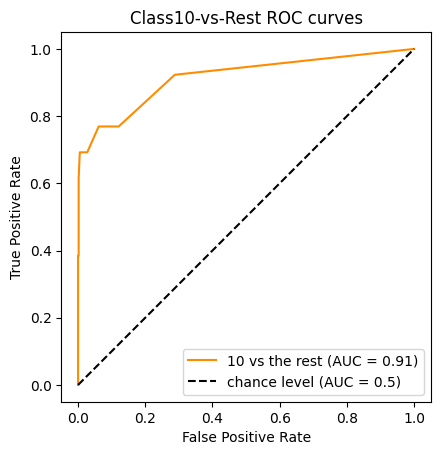

In [60]:
from sklearn.metrics import RocCurveDisplay

y_score = rfr.fit(list(X_train['Morgan2FP']), y_train).predict_proba(list(X_test['Morgan2FP']))

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Class{class_of_interest}-vs-Rest ROC curves")
plt.legend()
plt.show()

### Redes convolucionales

In [61]:
# example of a cnn for image classification
from numpy import set_printoptions
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [62]:
X = drugs['Morgan2FP']
y = drugs['drug_class_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.max()


11

In [63]:
x_train = np.array(list(X_train))
x_test = np.array(list(X_test))
n_classes = len(unique(y_train))
print(len(unique(y_train)))
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
in_shape = x_train.shape[1:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

12
(1400, 2048, 1) (1400,)
(600, 2048, 1) (600,)


In [92]:
model = Sequential()
model.add(Conv1D(35, 9, activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool1D(4))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
# fit the model
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {acc:.3f}')
# make a prediction
#   image = x_train[0]
y_pred = model.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: class={argmax(y_pred[1])}')

Epoch 1/5
11/11 [==============================] - 4s 231ms/step - loss: 2.1075 - accuracy: 0.3607
Epoch 2/5
11/11 [==============================] - 2s 208ms/step - loss: 1.3043 - accuracy: 0.5850
Epoch 3/5
11/11 [==============================] - 2s 209ms/step - loss: 1.0274 - accuracy: 0.6550
Epoch 4/5
11/11 [==============================] - 2s 198ms/step - loss: 0.8561 - accuracy: 0.7321
Epoch 5/5
11/11 [==============================] - 2s 201ms/step - loss: 0.7549 - accuracy: 0.7514
Accuracy: 0.750
19/19 [==============================] - 0s 21ms/step
Predicted: class=9


In [94]:
y_pred = model.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: class={argmax(y_pred)}')

y_pred_mor = [argmax(x) for x in y_pred]

print(x_test[29].shape)
print(list(y_test))
print(y_pred_mor)

19/19 [==============================] - 0s 22ms/step
Predicted: class=5400
(2048, 1)
[4, 9, 0, 2, 0, 0, 2, 6, 9, 0, 9, 0, 2, 0, 4, 0, 4, 0, 0, 5, 2, 3, 0, 0, 0, 7, 2, 0, 0, 9, 1, 0, 0, 0, 10, 0, 1, 0, 10, 4, 3, 6, 2, 0, 0, 3, 2, 0, 9, 1, 3, 2, 2, 0, 0, 4, 2, 0, 2, 0, 0, 2, 3, 8, 6, 2, 3, 0, 0, 5, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 9, 8, 0, 4, 0, 0, 3, 0, 2, 1, 0, 0, 0, 5, 0, 0, 4, 6, 0, 3, 4, 0, 2, 3, 4, 2, 1, 4, 1, 0, 2, 2, 0, 4, 1, 0, 0, 9, 0, 0, 0, 0, 8, 7, 4, 0, 0, 4, 2, 0, 1, 4, 4, 5, 3, 5, 3, 9, 0, 2, 0, 5, 8, 10, 2, 0, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 6, 0, 10, 2, 4, 2, 3, 3, 7, 0, 0, 10, 4, 4, 2, 0, 0, 4, 0, 0, 0, 1, 8, 0, 4, 3, 2, 3, 7, 3, 3, 3, 3, 1, 0, 6, 4, 9, 0, 8, 8, 9, 2, 4, 0, 2, 1, 4, 2, 0, 0, 4, 4, 4, 9, 0, 0, 7, 2, 5, 3, 4, 2, 0, 2, 4, 5, 2, 0, 2, 7, 8, 4, 3, 0, 4, 5, 2, 6, 4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 4, 3, 10, 0, 3, 5, 8, 0, 2, 10, 0, 1, 2, 1, 2, 9, 9, 0, 3, 2, 3, 2, 4, 2, 1, 0, 7, 0, 0, 1, 1, 2, 0, 3, 3, 7, 1, 4, 0, 9, 3, 0, 2, 2, 0, 0, 7, 3, 2, 3, 9, 2, 0, 4, 3, 2, 

In [95]:
print( metrics.classification_report(y_test,y_pred_mor))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       193
           1       0.80      0.85      0.82        46
           2       0.57      0.66      0.61        89
           3       0.68      0.72      0.70        67
           4       0.68      0.82      0.74        90
           5       0.70      0.39      0.50        18
           6       1.00      0.54      0.70        13
           7       1.00      0.50      0.67        20
           8       1.00      0.83      0.90        23
           9       0.92      0.79      0.85        28
          10       1.00      0.31      0.47        13

    accuracy                           0.75       600
   macro avg       0.83      0.66      0.71       600
weighted avg       0.77      0.75      0.75       600



In [73]:
vTab=metrics.confusion_matrix(y_test,y_preds)

In [74]:
vTab

array([[164,   0,  12,   7,  10,   0,   0,   0,   0,   0,   0],
       [  1,  37,   2,   1,   4,   1,   0,   0,   0,   0,   0],
       [ 18,   1,  55,   8,   5,   0,   0,   0,   0,   2,   0],
       [  7,   0,   3,  53,   3,   0,   0,   1,   0,   0,   0],
       [  6,   1,   5,   5,  72,   0,   0,   0,   0,   1,   0],
       [  5,   0,   1,   3,   2,   7,   0,   0,   0,   0,   0],
       [  3,   0,   0,   2,   1,   0,   7,   0,   0,   0,   0],
       [  2,   0,   4,   2,   1,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   4,   1,   0,   0,   0,  18,   0,   0],
       [  2,   0,   1,   0,   0,   0,   0,   0,   0,  25,   0],
       [  2,   0,   2,   4,   1,   0,   0,   0,   0,   0,   4]],
      dtype=int64)